In [126]:
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import re


In [4]:
def whatType(string):
    dic = eval(string)
    return dic['type']
def whatIsWord(string):
    dic = eval(string)
    return dic['word']

In [5]:
train_data = pd.read_csv('../data/dataset/train/train.csv')
train_data2 = train_data.copy()
train_data2['object_type'] = train_data2.object_entity.apply(lambda x: whatType(x))
train_data2['subject_type'] = train_data2.subject_entity.apply(lambda x: whatType(x))
train_data2.head()

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG


In [6]:
dev_index = train_data2.groupby(['label','object_type','subject_type']).sample(frac=0.2, random_state=777).index
dev_sample = train_data.iloc[dev_index]
train_sample = train_data.drop(dev_index)
dev_sample.shape,train_sample.shape
dev_sample.to_csv('../data/dataset/train/dev_sample.csv')
train_sample.to_csv('../data/dataset/train/train_sample.csv')


In [7]:
dev_sample.head()

,id,sentence,subject_entity,object_entity,label,source
15152,15152,1948년 10월 30일부터 대한국민항공사(KNA)에서 서울 - 부산 간 국내선 노...,"{'word': '대한국민항공', 'start_idx': 16, 'end_idx':...","{'word': '1948년', 'start_idx': 0, 'end_idx': 4...",no_relation,wikipedia
18346,18346,입단 첫 해에 당시 감독이었던 김응용의 총애를 받아 김응용이 2001년 삼성 라이온...,"{'word': '삼성 라이온즈', 'start_idx': 40, 'end_idx'...","{'word': '2001년', 'start_idx': 34, 'end_idx': ...",no_relation,wikipedia
28034,28034,1996년 3월 11일 13년간의 노동당 장기집권을 끝내고 총리에 취임하였다.,"{'word': '노동당', 'start_idx': 19, 'end_idx': 21...","{'word': '1996년', 'start_idx': 0, 'end_idx': 4...",no_relation,wikipedia
17620,17620,2012 팔도 프로 야구 한국시리즈는 2012년 10월 24일부터 삼성 라이온즈와 ...,"{'word': '삼성 라이온즈', 'start_idx': 37, 'end_idx'...","{'word': '2012년', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia
11638,11638,"엎친 데 덮친 격으로 LG 트윈스에서는 선수들 사이의 불화가 끊이지 않았는데, 급기...","{'word': 'KIA 타이거즈', 'start_idx': 68, 'end_idx...","{'word': '2009년', 'start_idx': 48, 'end_idx': ...",no_relation,wikipedia


In [8]:
train_sample.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(train_data2.drop(columns='label'), train_data2.label, test_size=0.2, shuffle=True, stratify=train_data2['label'], random_state=42)

In [10]:
x_train, x_valid, y_train, y_valid

(          id                                           sentence  \
 31875  31875  2003년을 끝으로 선수 생활을 마감하고 유격수 자리를 손시헌에게 넘긴 후, 200...   
 9518    9518  2010년 크리스마스에 요빌은 최하위를 기록하고 있었으나, 막스 에머와 폴 우튼 같...   
 29437  29437  중복인력 감축, 서울메트로, 서울특별시 도시철도공사 임원 인건비 절감으로 2027년...   
 29780  29780  그 결과 민주정의당 대표인 노태우가 대통령 직선제 개헌을 수용하는 6·29선언이 발...   
 27887  27887  한편 창당에 앞서 옛 유신당의 대표였던 마쓰노 요리히사는 과거 민주당을 탈당한 전력...   
 ...      ...                                                ...   
 31784  31784  모스크바 시간 기준 2015년 5월 12일, 암살당한 야당인사 보리스 넴초프가 한때...   
 22143  22143              김범수(金範洙, 1979년 1월 26일 ~)는 대한민국의 가수이다.   
 8825    8825  일반적으로 김정은의 어머니는 고용희(고영희)인 것으로 알려지고 있지만, 이복형 김정...   
 20549  20549  구자욱의 타구를 잡은 1루수 제이미 로맥이 1루를 찍은 뒤 2루로 뛰던 1루 주자를...   
 11625  11625  하지만 1945년 10월 24일에 벨로루시 소비에트 사회주의 공화국과 우크라이나 소...   
 
                                           subject_entity  \
 31875  {'word': '두산 베어스', 'start_idx': 51, 'end_idx':...   
 9518   {'word': '막스 에머', 'start_idx': 33, 'end_idx': ...   

In [11]:
train_data3 =train_data2.copy()
train_data3['complex']=train_data3.label+"-" + train_data3.object_type +"-"+ train_data3.subject_type
train_data3.head()


,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,complex
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG,no_relation-PER-ORG
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG,no_relation-ORG-ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG,org:member_of-ORG-ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG,org:top_members/employees-PER-ORG
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG,no_relation-DAT-ORG


In [12]:
complex_count = train_data3['complex'].value_counts()
complex_count[complex_count<10],complex_count[complex_count<10].size

(complex
 org:member_of-NOH-ORG             9
 per:alternate_names-LOC-PER       9
 per:other_family-POH-PER          7
 per:parents-LOC-PER               7
 per:place_of_residence-POH-PER    6
                                  ..
 per:children-DAT-PER              1
 per:place_of_birth-DAT-PER        1
 per:spouse-ORG-PER                1
 org:members-PER-PER               1
 per:other_family-ORG-PER          1
 Name: count, Length: 61, dtype: int64,
 61)

<Axes: xlabel='id', ylabel='label'>

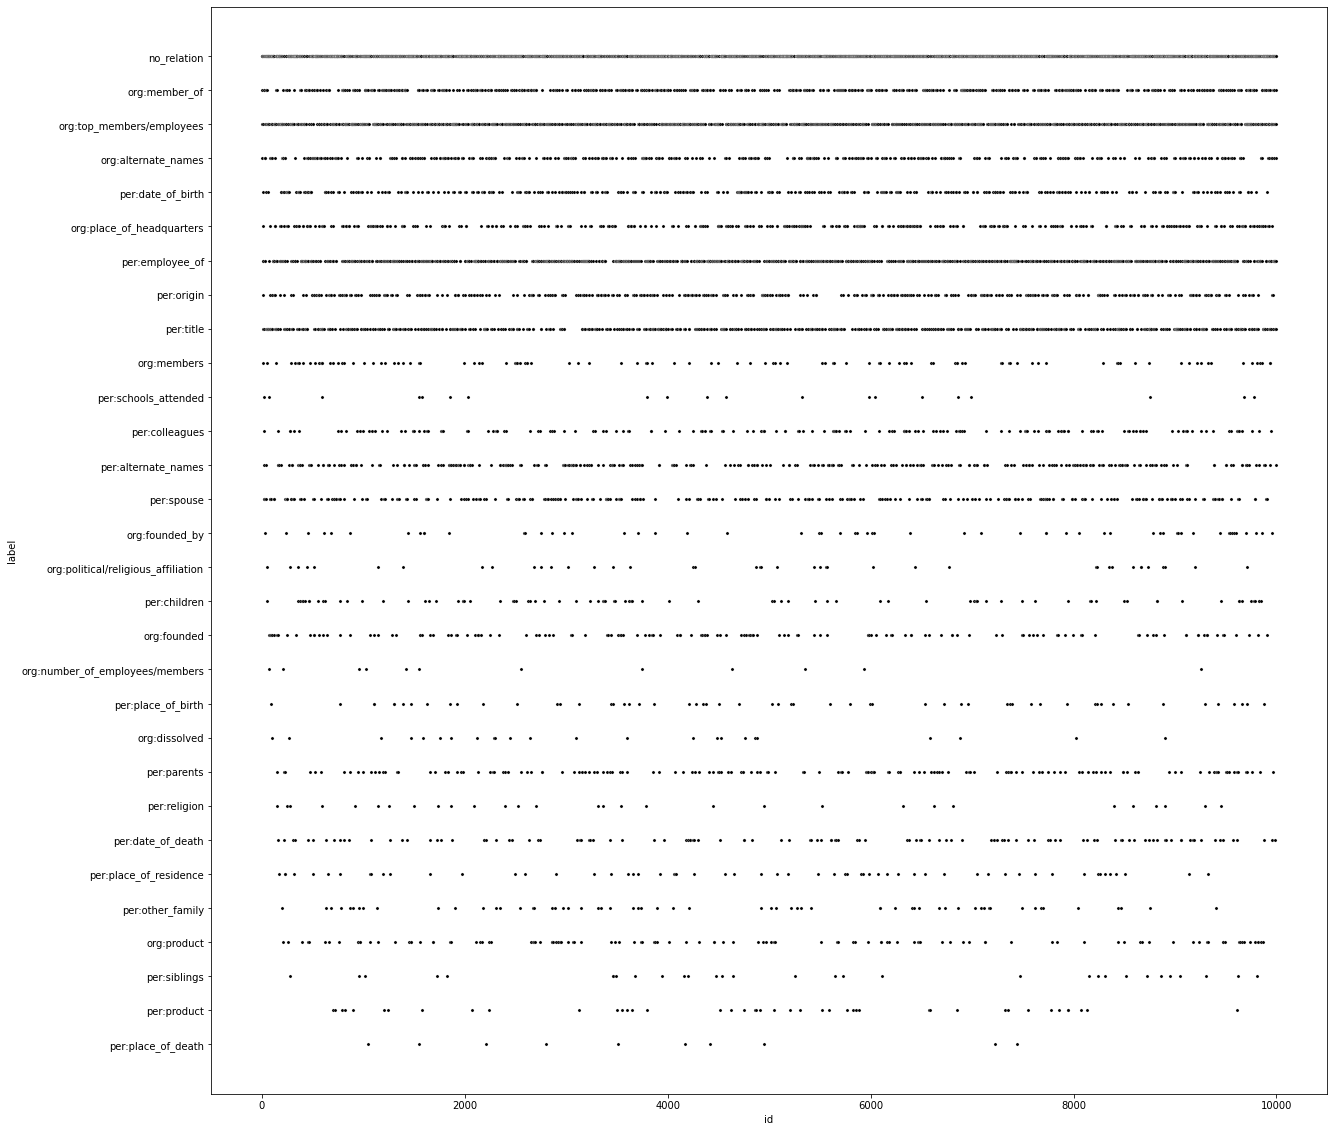

In [14]:
plt.figure(figsize=(20,20))
sns.scatterplot(x=train_data2['id'].iloc[:10000],y= train_data2['label'].iloc[:10000],s=10,color='black')

In [15]:
dev_index = train_data2.groupby(['label']).sample(n=20, random_state=777).index
dev_sample = train_data.iloc[dev_index]
train_sample = train_data.drop(dev_index)
dev_sample.shape,train_sample.shape
dev_sample.to_csv('../data/dataset/train/dev_equal.csv')
train_sample.to_csv('../data/dataset/train/train_equal.csv')


In [16]:
train_data2['label'].value_counts().min()

40

In [17]:
dev_sample

,id,sentence,subject_entity,object_entity,label,source
10971,10971,"1995년, 독일 분데스리가의 VfB 슈투트가르트로 이적했으며, 두 번의 UEFA ...","{'word': 'VfB 슈투트가르트', 'start_idx': 17, 'end_i...","{'word': '2000년', 'start_idx': 56, 'end_idx': ...",no_relation,wikipedia
12581,12581,2015년 11월 7일에 열린 FC 서울과의 슈퍼매치경기에서 K리그 데뷔골을 넣었다.,"{'word': 'FC 서울', 'start_idx': 17, 'end_idx': ...","{'word': '2015', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
29103,29103,"그는 1952년부터 1968년까지 보스턴/밀워키/애틀랜타 브레이브스, 휴스턴 애스트...","{'word': '애틀랜타 브레이브스', 'start_idx': 27, 'end_i...","{'word': '보스턴', 'start_idx': 19, 'end_idx': 21...",no_relation,wikipedia
15511,15511,"2009년 9월, 미국 프로 야구 필라델피아 필리스 소속의 야구 선수 박찬호는 《M...","{'word': '필라델피아 필리스', 'start_idx': 19, 'end_id...","{'word': '2009', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
22170,22170,2017년 일본 삿포로 동계 아시안 게임 쇼트트랙 여자 500m 결승에서 막판 1위...,"{'word': '판커신', 'start_idx': 67, 'end_idx': 69...","{'word': '쇼트트랙', 'start_idx': 23, 'end_idx': 2...",no_relation,wikipedia
...,...,...,...,...,...,...
10461,10461,1963년 소련 물리학자 니콜라이 바소프와 올렉 크로힌 소련과학원 학술회원은 레이저...,"{'word': '니콜라이 바소프', 'start_idx': 14, 'end_idx...","{'word': '물리학자', 'start_idx': 9, 'end_idx': 12...",per:title,wikipedia
28871,28871,"이대수가 그 해 골든 글러브 유격수 부문을 수상하여 다시 한 번 ""연습생 신화""를 ...","{'word': '이대수', 'start_idx': 0, 'end_idx': 2, ...","{'word': '유격수', 'start_idx': 81, 'end_idx': 83...",per:title,wikipedia
21029,21029,1920년 후반부터 독립운동가들의 통합운동이 꾸준히 전개되어 1931년 상해에서 안...,"{'word': '안창호', 'start_idx': 45, 'end_idx': 47...","{'word': '독립운동가', 'start_idx': 11, 'end_idx': ...",per:title,wikipedia
13727,13727,"이 자리에는 김희겸 경기도 행정1부지사, 박광진 대한한돈협회 경기도협의회장, 김종태...","{'word': '김희겸', 'start_idx': 7, 'end_idx': 9, ...","{'word': '경기도 행정1부지사', 'start_idx': 11, 'end_i...",per:title,wikitree


In [18]:
train_data3.head()

,id,sentence,subject_entity,object_entity,label,source,object_type,subject_type,complex
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,PER,ORG,no_relation-PER-ORG
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,ORG,ORG,no_relation-ORG-ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,ORG,ORG,org:member_of-ORG-ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,PER,ORG,org:top_members/employees-PER-ORG
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,DAT,ORG,no_relation-DAT-ORG


In [21]:
train_data4 = train_data.copy()
train_data4['object_word'] = train_data4.object_entity.apply(lambda x: whatIsWord(x))
train_data4['subject_word'] = train_data4.subject_entity.apply(lambda x: whatIsWord(x))
train_data4.head()

,id,sentence,subject_entity,object_entity,label,source,object_word,subject_word
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,조지 해리슨,비틀즈
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,대안신당,민주평화당
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,한국프로축구연맹,광주FC
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,박정부,아성다이소
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,1967,요미우리 자이언츠


In [123]:
def etc_cut(string,ob_word,sub_word,label):
    if label =='no_relation':
        return None
    sentence = string.split(' 등 ')
    sentence_front = sentence[0].split(',')[:-1]
    sentence_front=','.join(sentence_front)
    result_sentence = sentence_front + ' 등 ' +' 등 '.join(sentence[1:])
    if ob_word in result_sentence and sub_word in result_sentence:
        return result_sentence
    return None
def find_result(sentence, entity ,word):
    dic_sentence = eval(entity)
    start_idx = sentence.index(word)
    dic_sentence['start_idx'] =start_idx
    dic_sentence['end_idx'] =start_idx + len(word)-1
    return str(dic_sentence)


In [125]:
def etc_cut(string,ob_word,sub_word,label):
    if label =='no_relation':
        return None
    sentence = string.split(' 등 ')
    sentence_front = sentence[0].split(',')[:-1]
    sentence_front=','.join(sentence_front)
    result_sentence = sentence_front + ' 등 ' +' 등 '.join(sentence[1:])
    if ob_word in result_sentence and sub_word in result_sentence:
        return result_sentence
    return None
def find_result(sentence, entity ,word):
    dic_sentence = eval(entity)
    start_idx = sentence.index(word)
    dic_sentence['start_idx'] =start_idx
    dic_sentence['end_idx'] =start_idx + len(word)-1
    return str(dic_sentence)



etc_data= train_data4[train_data4['sentence'].str.contains(' 등 ')]
etc_data2 = etc_data.copy()

etc_data2['sentence'] = etc_data['id'].apply(lambda x: etc_cut(etc_data['sentence'].loc[x], etc_data['object_word'].loc[x], etc_data['subject_word'].loc[x], etc_data['label'].loc[x]) )
etc_data2 = etc_data2.dropna()
etc_data2['subject_entity'] = etc_data2['id'].apply(lambda x: find_result(etc_data2['sentence'].loc[x],etc_data2['subject_entity'].loc[x],etc_data2['subject_word'].loc[x]))
etc_data2['object_entity'] = etc_data2['id'].apply(lambda x: find_result(etc_data2['sentence'].loc[x],etc_data2['object_entity'].loc[x],etc_data2['object_word'].loc[x]))
etc_data2


,id,sentence,subject_entity,object_entity,label,source,object_word,subject_word
18,18,"문성민은 경기대학교에 입학하여 황동일, 신영석과 함께 경기대학교의 전성기를 이끌면서...","{'word': '문성민', 'start_idx': 0, 'end_idx': 2, ...","{'word': '경기대', 'start_idx': 5, 'end_idx': 7, ...",per:schools_attended,wikipedia,경기대,문성민
103,103,서울은퇴공무원상록자원봉사단은 2019년 4월 공무원연금공단(이사장 정남준) 서울지부...,"{'word': '공무원연금공단', 'start_idx': 25, 'end_idx'...","{'word': '정남준', 'start_idx': 37, 'end_idx': 39...",org:top_members/employees,wikitree,정남준,공무원연금공단
112,112,"이날 출판기념회에는 서삼석 더불어민주당 전남도당위원장을 비롯하여, 이개호 국회의원 ...","{'word': '심상정', 'start_idx': 68, 'end_idx': 70...","{'word': '정의당', 'start_idx': 74, 'end_idx': 76...",per:employee_of,wikitree,정의당,심상정
161,161,"조인철 광주광역시 문화경제부시장은 지난 22일 중외공원 일원에 위치한 시립미술관, ...","{'word': '조인철', 'start_idx': 0, 'end_idx': 2, ...","{'word': '광주광역시 문화경제부시장', 'start_idx': 4, 'end...",per:title,wikitree,광주광역시 문화경제부시장,조인철
227,227,등 벽에 몰리지만 때맞추어 찾아온 로한 왕 세오덴의 원군과 아라고른이 데려온 곤도...,"{'word': '아라고른', 'start_idx': 34, 'end_idx': 3...","{'word': '곤도르', 'start_idx': 44, 'end_idx': 46...",per:employee_of,wikipedia,곤도르,아라고른
...,...,...,...,...,...,...,...,...
32414,32414,김강립 중앙재난안전대책본부 제1총괄조정관(보건복지부 차관)은 18일 “수도권의 중환...,"{'word': '보건복지부', 'start_idx': 23, 'end_idx': ...","{'word': '김강립', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,policy_briefing,김강립,보건복지부
32447,32447,"장 의원은 광주일고, 서울대 출신으로 행정고시를 통해 공직에 입문한 뒤 기획예산처 ...","{'word': '기획재정부', 'start_idx': 157, 'end_idx':...","{'word': '기획예산처', 'start_idx': 40, 'end_idx': ...",org:members,wikitree,기획예산처,기획재정부
32452,32452,"스크라이크는 e스포츠, 농구, 야구 등 SK텔레콤이 운영 및 후원하는 각종 스포츠를...","{'word': 'SK텔레콤', 'start_idx': 22, 'end_idx': ...","{'word': 'SK그룹', 'start_idx': 62, 'end_idx': 6...",org:member_of,wikitree,SK그룹,SK텔레콤
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree,부산 서구·동구,유기준


In [85]:
print(etc_data['sentence'].loc[112])
print(etc_data['subject_entity'].loc[112])
print(etc_data['object_entity'].loc[112])

이날 출판기념회에는 서삼석 더불어민주당 전남도당위원장을 비롯하여, 이개호 국회의원, 김정호 국회의원 등 다수의 정치인들이 참석할 예정이며, 심상정의원(정의당 대표), 안규백 의원, 황주홍 의원, 진선미 의원은 영상으로 축하 메시지를 대신한다.
{'word': '심상정', 'start_idx': 78, 'end_idx': 80, 'type': 'PER'}
{'word': '정의당', 'start_idx': 84, 'end_idx': 86, 'type': 'ORG'}


In [118]:
print(etc_data2['sentence'].loc[18])
print(etc_data2['subject_entity'].loc[18])
print(etc_data2['object_entity'].loc[18])


문성민은 경기대학교에 입학하여 황동일, 신영석과 함께 경기대학교의 전성기를 이끌면서 하계대회, 전국체전 등 3관왕을 이룬다.
{'word': '문성민', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}
{'word': '경기대', 'start_idx': 5, 'end_idx': 7, 'type': 'ORG'}


In [144]:
def bracket_cut(string,ob_word,sub_word):

    pattern = r"\([^)]+\)"
    result_sentence = re.sub(pattern, "", string)
    if result_sentence.count('(') != result_sentence.count(')'):
        return None
    if ob_word in result_sentence and sub_word in result_sentence:
        return result_sentence
    return None

bracket_data= train_data4[(train_data4['sentence'].str.contains('\(')) & (train_data4.label != 'no_relation')]


bracket_data2= bracket_data.copy()
bracket_data2['sentence'] = bracket_data2['id'].apply(lambda x: bracket_cut(bracket_data2['sentence'].loc[x], bracket_data2['object_word'].loc[x], bracket_data2['subject_word'].loc[x]))
bracket_data2 = bracket_data2.dropna()
bracket_data2['subject_entity'] = bracket_data2['id'].apply(lambda x: find_result(bracket_data2['sentence'].loc[x],bracket_data2['subject_entity'].loc[x],bracket_data2['subject_word'].loc[x]))
bracket_data2['object_entity'] = bracket_data2['id'].apply(lambda x: find_result(bracket_data2['sentence'].loc[x],bracket_data2['object_entity'].loc[x],bracket_data2['object_word'].loc[x]))

bracket_data2

,id,sentence,subject_entity,object_entity,label,source,object_word,subject_word
11,11,이른바 'Z세대'로 불리는 1990년대 중반 이후 태어난 세대에게 대표 아이콘으로 ...,"{'word': '빌리 아일리시', 'start_idx': 60, 'end_idx'...","{'word': '싱어송라이터', 'start_idx': 53, 'end_idx':...",per:title,wikitree,싱어송라이터,빌리 아일리시
40,40,배우 장신영 씨와 남편 강경준 씨가 둘째를 품에 안았다.,"{'word': '강경준', 'start_idx': 13, 'end_idx': 15...","{'word': '장신영', 'start_idx': 3, 'end_idx': 5, ...",per:spouse,wikitree,장신영,강경준
67,67,"1984년에는 포스트시즌을 포함해 56경기 324.2이닝, 31승, 6세이브, 18...","{'word': '롯데 자이언츠', 'start_idx': 95, 'end_idx'...","{'word': '1984년', 'start_idx': 0, 'end_idx': 4...",org:founded,wikipedia,1984년,롯데 자이언츠
75,75,더군다나 이날 경기에는 잔니 인판티노 국제축구연맹 회장까지 관전했지만 북한은 '무관...,"{'word': '국제축구연맹', 'start_idx': 21, 'end_idx':...","{'word': '잔니 인판티노', 'start_idx': 13, 'end_idx'...",org:top_members/employees,wikitree,잔니 인판티노,국제축구연맹
76,76,"1727년, 옹정제는 자신의 심복이자 과거 사천 순무로 그 곳 사정을 잘 알던 연갱...","{'word': '연갱요', 'start_idx': 44, 'end_idx': 46...","{'word': '무원대장군', 'start_idx': 49, 'end_idx': ...",per:title,wikipedia,무원대장군,연갱요
...,...,...,...,...,...,...,...,...
32397,32397,브리사의 단종 이후 약 6년 동안 비었던 소형차의 자리를 채운 프라이드는 3도어 해...,"{'word': '기아산업', 'start_idx': 83, 'end_idx': 8...","{'word': '기아자동차', 'start_idx': 168, 'end_idx':...",org:alternate_names,wikipedia,기아자동차,기아산업
32402,32402,"1990년 국가보훈처에 의해 이상룡, 이승화, 이광민 등 재만독립운동가들의 유해와 ...","{'word': '이광민', 'start_idx': 26, 'end_idx': 28...","{'word': '독립운동가', 'start_idx': 34, 'end_idx': ...",per:title,wikipedia,독립운동가,이광민
32409,32409,중세 세르비아 공국의 수도였던 스타리라스가 사라진 뒤에 설립된 것으로 추정된다.,"{'word': '중세 세르비아 공국', 'start_idx': 0, 'end_id...","{'word': '스타리라스', 'start_idx': 17, 'end_idx': ...",org:members,wikipedia,스타리라스,중세 세르비아 공국
32433,32433,"2008년 11월 5일, 드미트리 메드베데프 러시아 대통령은 모스크바 크렘린궁에서 ...","{'word': '드미트리 메드베데프', 'start_idx': 14, 'end_i...","{'word': '러시아', 'start_idx': 25, 'end_idx': 27...",per:place_of_residence,wikipedia,러시아,드미트리 메드베데프


In [138]:

text = "서울은퇴공무원상록자원봉사단은 2019년 4월 공무원연금공단(이사장 정남준) 서울지부의 후원으로 결성된 단체로서 ‘구세군자선냄비 거리모금’ 활동에 적극 참여하여 표창을 수여받게 되었으며, 이외에도 ‘제100회 서울시 전국체육대회’ 및 ‘제39회 전국장애인체육대회’의 성공적 개최를 위한 자원봉사활동에도 참여하는 등 사회공헌활동을 활발히 펼쳤다."

# 괄호와 괄호 안의 내용을 제거하는 정규 표현식
pattern = r"\([^)]+\)"

# 정규 표현식을 사용하여 문자열에서 패턴에 해당하는 부분을 제거
modified_text = re.sub(pattern, "", text)

print(modified_text)

서울은퇴공무원상록자원봉사단은 2019년 4월 공무원연금공단 서울지부의 후원으로 결성된 단체로서 ‘구세군자선냄비 거리모금’ 활동에 적극 참여하여 표창을 수여받게 되었으며, 이외에도 ‘제100회 서울시 전국체육대회’ 및 ‘제39회 전국장애인체육대회’의 성공적 개최를 위한 자원봉사활동에도 참여하는 등 사회공헌활동을 활발히 펼쳤다.


In [145]:
bracket_data3= bracket_data2[train_data.columns]
etc_data3 = etc_data2[train_data.columns]

In [146]:
bracket_data3

,id,sentence,subject_entity,object_entity,label,source
11,11,이른바 'Z세대'로 불리는 1990년대 중반 이후 태어난 세대에게 대표 아이콘으로 ...,"{'word': '빌리 아일리시', 'start_idx': 60, 'end_idx'...","{'word': '싱어송라이터', 'start_idx': 53, 'end_idx':...",per:title,wikitree
40,40,배우 장신영 씨와 남편 강경준 씨가 둘째를 품에 안았다.,"{'word': '강경준', 'start_idx': 13, 'end_idx': 15...","{'word': '장신영', 'start_idx': 3, 'end_idx': 5, ...",per:spouse,wikitree
67,67,"1984년에는 포스트시즌을 포함해 56경기 324.2이닝, 31승, 6세이브, 18...","{'word': '롯데 자이언츠', 'start_idx': 95, 'end_idx'...","{'word': '1984년', 'start_idx': 0, 'end_idx': 4...",org:founded,wikipedia
75,75,더군다나 이날 경기에는 잔니 인판티노 국제축구연맹 회장까지 관전했지만 북한은 '무관...,"{'word': '국제축구연맹', 'start_idx': 21, 'end_idx':...","{'word': '잔니 인판티노', 'start_idx': 13, 'end_idx'...",org:top_members/employees,wikitree
76,76,"1727년, 옹정제는 자신의 심복이자 과거 사천 순무로 그 곳 사정을 잘 알던 연갱...","{'word': '연갱요', 'start_idx': 44, 'end_idx': 46...","{'word': '무원대장군', 'start_idx': 49, 'end_idx': ...",per:title,wikipedia
...,...,...,...,...,...,...
32397,32397,브리사의 단종 이후 약 6년 동안 비었던 소형차의 자리를 채운 프라이드는 3도어 해...,"{'word': '기아산업', 'start_idx': 83, 'end_idx': 8...","{'word': '기아자동차', 'start_idx': 168, 'end_idx':...",org:alternate_names,wikipedia
32402,32402,"1990년 국가보훈처에 의해 이상룡, 이승화, 이광민 등 재만독립운동가들의 유해와 ...","{'word': '이광민', 'start_idx': 26, 'end_idx': 28...","{'word': '독립운동가', 'start_idx': 34, 'end_idx': ...",per:title,wikipedia
32409,32409,중세 세르비아 공국의 수도였던 스타리라스가 사라진 뒤에 설립된 것으로 추정된다.,"{'word': '중세 세르비아 공국', 'start_idx': 0, 'end_id...","{'word': '스타리라스', 'start_idx': 17, 'end_idx': ...",org:members,wikipedia
32433,32433,"2008년 11월 5일, 드미트리 메드베데프 러시아 대통령은 모스크바 크렘린궁에서 ...","{'word': '드미트리 메드베데프', 'start_idx': 14, 'end_i...","{'word': '러시아', 'start_idx': 25, 'end_idx': 27...",per:place_of_residence,wikipedia


In [172]:
data_argument = pd.concat([train_data, bracket_data3])
data_argument = pd.concat([data_argument, etc_data3])
data_argument.id= range(data_argument.shape[0])
data_argument.index = range(data_argument.shape[0])
data_argument.to_csv('../data/dataset/train/train_argument.csv')

data_argument

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
37903,37903,김강립 중앙재난안전대책본부 제1총괄조정관(보건복지부 차관)은 18일 “수도권의 중환...,"{'word': '보건복지부', 'start_idx': 23, 'end_idx': ...","{'word': '김강립', 'start_idx': 0, 'end_idx': 2, ...",org:top_members/employees,policy_briefing
37904,37904,"장 의원은 광주일고, 서울대 출신으로 행정고시를 통해 공직에 입문한 뒤 기획예산처 ...","{'word': '기획재정부', 'start_idx': 157, 'end_idx':...","{'word': '기획예산처', 'start_idx': 40, 'end_idx': ...",org:members,wikitree
37905,37905,"스크라이크는 e스포츠, 농구, 야구 등 SK텔레콤이 운영 및 후원하는 각종 스포츠를...","{'word': 'SK텔레콤', 'start_idx': 22, 'end_idx': ...","{'word': 'SK그룹', 'start_idx': 62, 'end_idx': 6...",org:member_of,wikitree
37906,37906,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree


<Axes: xlabel='label'>

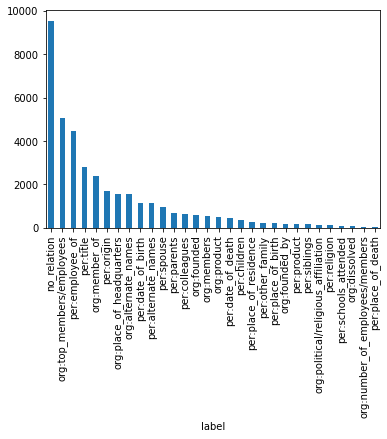

In [177]:
data_argument.label.value_counts().plot(kind='bar')


<Axes: xlabel='label'>

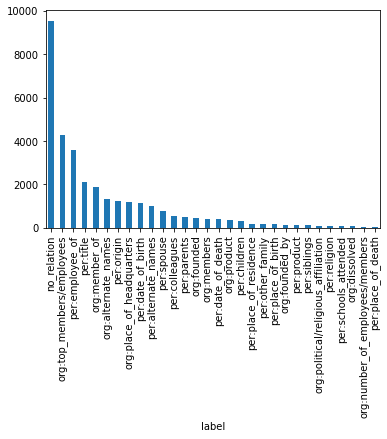

In [174]:
train_data.label.value_counts().plot(kind='bar')


<Axes: xlabel='label'>

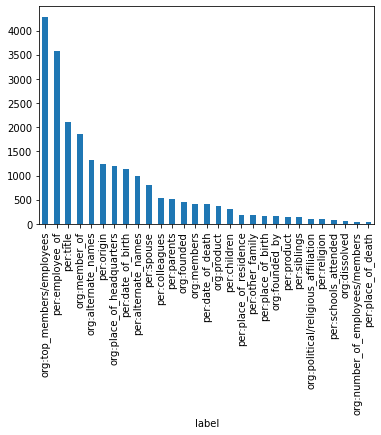

In [178]:
train_data[train_data.label != 'no_relation'].label.value_counts().plot(kind='bar')


<Axes: xlabel='label'>

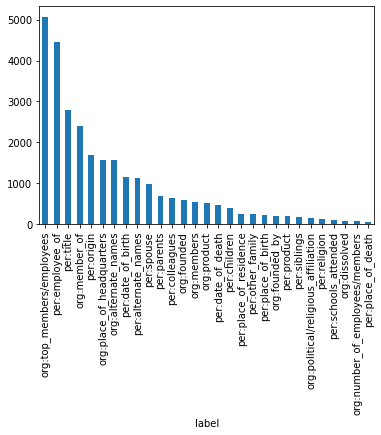

In [179]:
data_argument[data_argument.label != 'no_relation'].label.value_counts().plot(kind='bar')


<Axes: xlabel='label'>

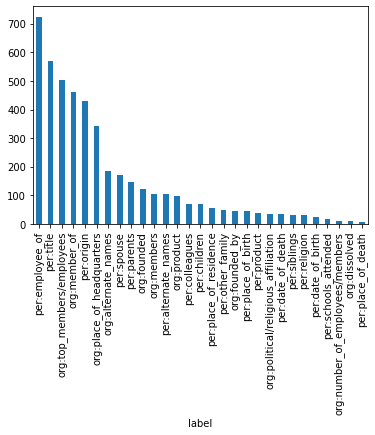

In [180]:
bracket_data3.label.value_counts().plot(kind='bar')

<Axes: xlabel='label'>

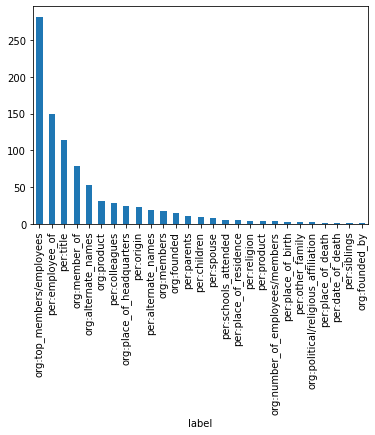

In [181]:
etc_data3.label.value_counts().plot(kind='bar')
